In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
import mglearn
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
data_train=pd.read_csv('hw5_data_train.csv')
data_test=pd.read_csv('hw5_data_train.csv')

# Task1

In [3]:
vect=CountVectorizer()

In [4]:
df=data_train[['Title','Review']]
df_t,test_label=data_test[['Title','Review']],data_test['Recommended']
title,body,label=data_train['Title'],data_train['Review'],data_train['Recommended']
mask_title=pd.isnull(title)
mask_body=pd.isnull(body)

In [5]:
title_train=vect.fit_transform(title.loc[~mask_title])
title_label=label.loc[~mask_title]

## 1) Title

In [6]:
scoring_fun='f1'
cross_valid=cross_val_score(LinearSVC(),title_train,title_label,scoring=scoring_fun,cv=5)
print('The mean cross validation score using %s is %.6f'%(scoring_fun,np.mean(cross_valid)))
lin_svm_title=LinearSVC().fit(title_train,title_label)
imp_f_ind=np.argsort(abs(lin_svm_title.coef_)).ravel()[-20:]
feature_name=np.array(vect.get_feature_names())[imp_f_ind]

The mean cross validation score using f1 is 0.932395


In [7]:
df_feature_title=pd.DataFrame({'feature':feature_name,'coef':lin_svm_title.coef_.ravel()[imp_f_ind]})
df_feature_title=df_feature_title.sort_index(by='coef')
df_feature_title=df_feature_title.reset_index()

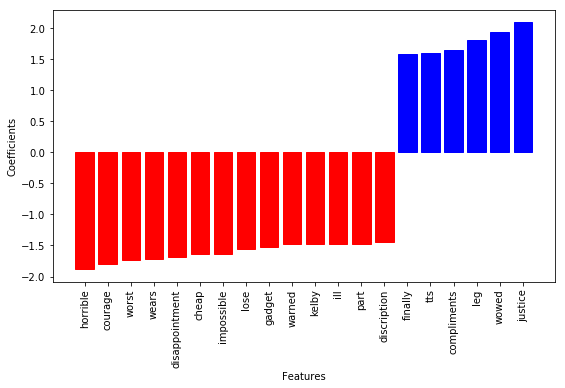

In [8]:
fig=plt.figure(figsize=(9,5))
barplot=plt.bar(range(20),df_feature_title['coef'])
plt.xticks(range(20),df_feature_title['feature'],rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
for i in range(20):
    if df_feature_title['coef'].loc[i]<0:
        barplot[i].set_color('red')
    else:
        barplot[i].set_color('blue')

In [9]:
param_grid={'C':np.logspace(-2,1,50)}
grid_title=GridSearchCV(LinearSVC(),param_grid=param_grid,cv=5,scoring=scoring_fun).fit(title_train,title_label)
print('The best regularization parameter is %.6f'%grid_title.best_params_['C'])
print('The best mean cross validation score using %s is %.6f'%(scoring_fun,grid_title.best_score_))

The best regularization parameter is 0.390694
The best mean cross validation score using f1 is 0.934283


In [10]:
imp_f_ind1=np.argsort(abs(grid_title.best_estimator_.coef_)).ravel()[-20:]
feature_name1=np.array(vect.get_feature_names())[imp_f_ind1]
df_feature_title1=pd.DataFrame({'feature':feature_name1,'coef':grid_title.best_estimator_.coef_.ravel()[imp_f_ind1]})
df_feature_title1=df_feature_title1.sort_index(by='coef')
df_feature_title1=df_feature_title1.reset_index()

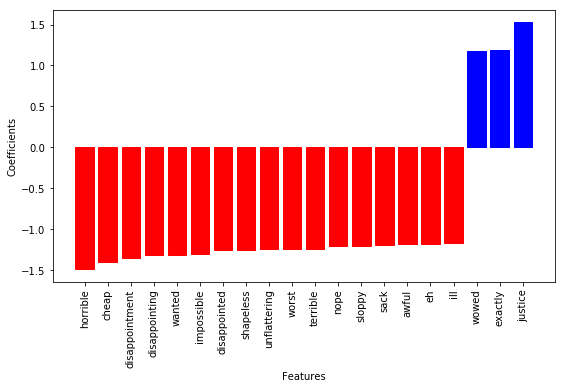

In [11]:
fig=plt.figure(figsize=(9,5))
barplot1=plt.bar(range(20),df_feature_title1['coef'])
plt.xticks(range(20),df_feature_title1['feature'],rotation=90)
plt.ylabel('Coefficients')
plt.xlabel('Features')
for i in range(20):
    if df_feature_title1['coef'].loc[i]<0:
        barplot1[i].set_color('red')
    else:
        barplot1[i].set_color('blue')

## 2) Body

In [12]:
body_train=vect.fit_transform(body.loc[~mask_body])
body_label=label.loc[~mask_body]

In [13]:
cross_valid=cross_val_score(LinearSVC(),body_train,body_label,scoring=scoring_fun,cv=5)
print('The mean cross validation score for %s is %.6f'%(scoring_fun,np.mean(cross_valid)))
lin_svm_body=LinearSVC().fit(body_train,body_label)
imp_f_ind=np.argsort(abs(lin_svm_body.coef_)).ravel()[-20:]

The mean cross validation score for f1 is 0.918490


In [14]:
feature_name=np.array(vect.get_feature_names())[imp_f_ind]
df_feature_body=pd.DataFrame({'feature':feature_name,'coef':lin_svm_body.coef_.ravel()[imp_f_ind]})
df_feature_body=df_feature_body.sort_index(by='coef')
df_feature_body=df_feature_body.reset_index()

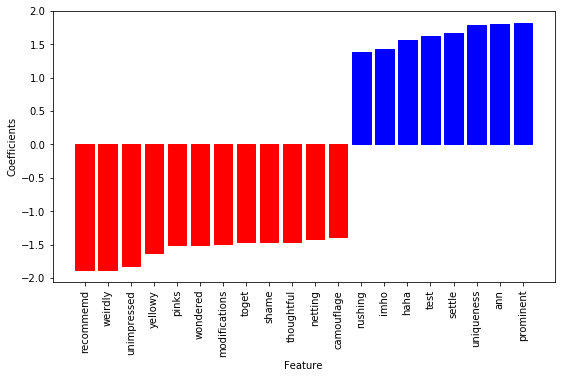

In [15]:
fig=plt.figure(figsize=(9,5))
barplot=plt.bar(range(20),df_feature_body['coef'])
plt.xticks(range(20),df_feature_body['feature'],rotation=90)
plt.xlabel('Feature');plt.ylabel('Coefficients')
for i in range(20):
    if df_feature_body['coef'].loc[i]<0:
        barplot[i].set_color('red')
    else:
        barplot[i].set_color('blue')

In [16]:
param_body={'C':np.logspace(-3,1,50)}
grid_body=GridSearchCV(LinearSVC(),param_grid=param_body,cv=5,scoring=scoring_fun).fit(body_train,body_label)
print('The best regulation coefficient is %.6f'%grid_body.best_params_['C'])
print('The best mean cross validation score using %s is %.6f'%(scoring_fun,grid_body.best_score_))

The best regulation coefficient is 0.016768
The best mean cross validation score using f1 is 0.934917


In [17]:
imp_f_ind1=np.argsort(abs(grid_body.best_estimator_.coef_)).ravel()[-20:]
feature_name=np.array(vect.get_feature_names())[imp_f_ind1]
df_feature_body1=pd.DataFrame({'feature':feature_name,'coef':grid_body.best_estimator_.coef_.ravel()[imp_f_ind1]})
df_feature_body1=df_feature_body1.sort_index(by='coef')
df_feature_body1=df_feature_body1.reset_index()

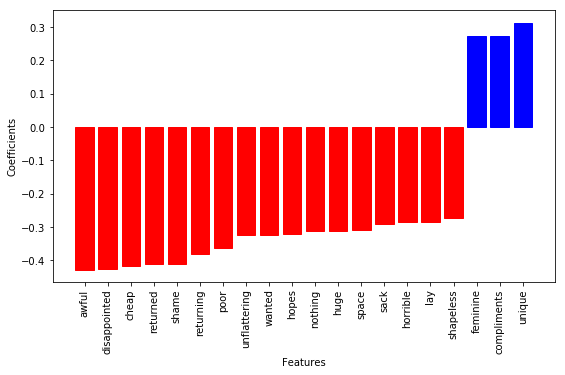

In [18]:
fig=plt.figure(figsize=(9,5))
barplot=plt.bar(range(20),df_feature_body1['coef'])
plt.xticks(range(20),df_feature_body1['feature'],rotation=90)
plt.xlabel('Features');plt.ylabel('Coefficients')
for i in range(20):
    if df_feature_body1['coef'].loc[i]<0:
        barplot[i].set_color('red')
    else:
        barplot[i].set_color('blue')

## 3) Title Text Combination

In [19]:
def Concat(record):
    return ' '.join([str(i) for i in record])

In [20]:
vect_tt=CountVectorizer()
title_text=vect_tt.fit_transform(df.apply(Concat,axis=1))
cross_valid=cross_val_score(LinearSVC(),title_text,label,cv=5,scoring=scoring_fun)
print('The mean cross validation score for %s is %.6f'%(scoring_fun,np.mean(cross_valid)))
lin_title_text=LinearSVC().fit(title_text,label)
imp_f_ind=np.argsort(abs(lin_title_text.coef_)).ravel()[-20:]
feature_name=np.array(vect_tt.get_feature_names())[imp_f_ind]

The mean cross validation score for f1 is 0.928374


In [21]:
df_title_text=pd.DataFrame({'feature':feature_name,'coef':lin_title_text.coef_.ravel()[imp_f_ind]})
df_title_text.sort_index(by='coef',inplace=True)
df_title_text.reset_index(inplace=True)

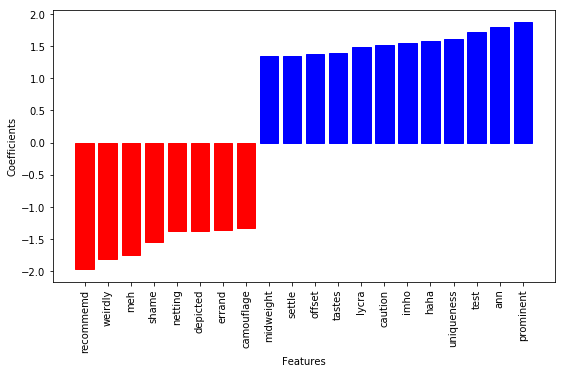

In [22]:
fig=plt.figure(figsize=(9,5))
barplot=plt.bar(range(20),df_title_text['coef'])
plt.xticks(range(20),df_title_text['feature'],rotation=90)
plt.xlabel('Features');plt.ylabel('Coefficients')
for i in range(20):
    if df_title_text['coef'].loc[i]<0:
        barplot[i].set_color('red')
    else:
        barplot[i].set_color('blue')

In [23]:
param_tt={'C':np.logspace(-2,1,50)}
grid_tt=GridSearchCV(LinearSVC(),param_grid=param_tt,cv=5,scoring=scoring_fun).fit(title_text,label)
print('The best regulation coefficient is %.6f'%grid_tt.best_params_['C'])
print('The best mean cross validation score using %s is %.6f'%(scoring_fun,grid_tt.best_score_))

The best regulation coefficient is 0.017575
The best mean cross validation score using f1 is 0.942791


In [24]:
imp_f_ind1=np.argsort(abs(grid_tt.best_estimator_.coef_)).ravel()[-20:]
feature_name=np.array(vect_tt.get_feature_names())[imp_f_ind1]
df_title_text1=pd.DataFrame({'features':feature_name,'coef':grid_tt.best_estimator_.coef_.ravel()[imp_f_ind1]})
df_title_text1.sort_index(by='coef',inplace=True)
df_title_text1.reset_index(inplace=True)

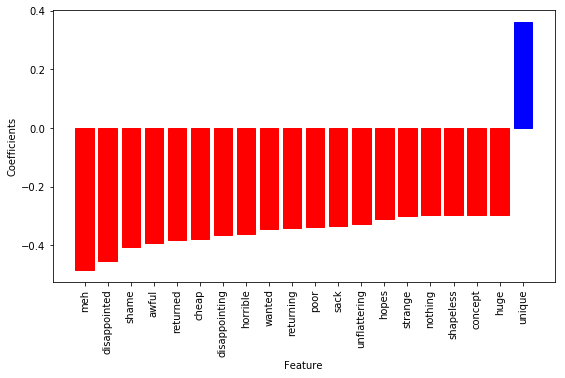

In [25]:
fig=plt.figure(figsize=(9,5))
barplot=plt.bar(range(20),df_title_text1['coef'])
plt.xticks(range(20),df_title_text1['features'],rotation=90)
plt.xlabel('Feature');plt.ylabel('Coefficients')
for i in range(20):
    if df_title_text1['coef'].loc[i]<0:
        barplot[i].set_color('red')
    else:
        barplot[i].set_color('blue')


## 4) Vector Combination

In [26]:
def remove_null(df):
    for col in df.columns:
        df[col]=np.where(pd.isnull(df[col]),'',df[col])
    return df
df1=remove_null(df)

In [27]:
vect_title=CountVectorizer()
vect_body=CountVectorizer()
title_vect=vect_title.fit_transform(df1['Title'])
title_body=vect_body.fit_transform(df1['Review'])
vect_train=hstack((title_vect,title_body))

In [28]:
cross_valid=cross_val_score(LinearSVC(),vect_train,label,cv=5,scoring=scoring_fun)
print('The mean cross validation score for %s is %.6f'%(scoring_fun,np.mean(cross_valid)))
lin_vect=LinearSVC().fit(vect_train,label)
imp_f_ind=np.argsort(abs(lin_vect.coef_)).ravel()[-20:]

The mean cross validation score for f1 is 0.930123


In [29]:
imp_f_ind=np.argsort(abs(lin_vect.coef_)).ravel()[-20:]
feature_name=np.r_[vect_title.get_feature_names(),vect_body.get_feature_names()][imp_f_ind]
df_feature_vect=pd.DataFrame({'features':feature_name,'coef':lin_vect.coef_.ravel()[imp_f_ind]})
df_feature_vect.sort_index(by='coef',inplace=True)
df_feature_vect.reset_index(inplace=True)

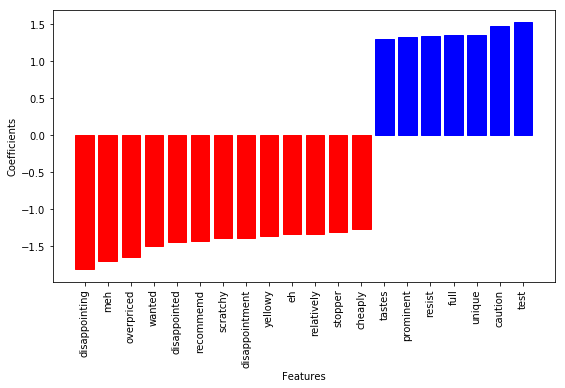

In [30]:
fig=plt.figure(figsize=(9,5))
barplot=plt.bar(range(20),df_feature_vect['coef'])
plt.xticks(range(20),df_feature_vect['features'],rotation=90)
plt.xlabel('Features');plt.ylabel('Coefficients')
for i in range(20):
    if df_feature_vect['coef'].loc[i]<0:
        barplot[i].set_color('red')
    else:
        barplot[i].set_color('blue')

In [31]:
param_vect={'C':np.logspace(-3,1,50)}
grid_vect=GridSearchCV(LinearSVC(),param_grid=param_vect,cv=5,scoring=scoring_fun).fit(vect_train,label)
print('The best regulation coefficient is %.6f'%grid_vect.best_params_['C'])
print('The best mean cross validation score using %s is %.6f'%(scoring_fun,grid_vect.best_score_))

The best regulation coefficient is 0.024421
The best mean cross validation score using f1 is 0.941761


In [32]:
imp_f_ind1=np.argsort(abs(grid_vect.best_estimator_.coef_)).ravel()[-20:]
feature_name=np.r_[vect_title.get_feature_names(),vect_body.get_feature_names()][imp_f_ind1]
df_feature_vect1=pd.DataFrame({'feature':feature_name,'coef':grid_vect.best_estimator_.coef_.ravel()[imp_f_ind1]})
df_feature_vect1.sort_index(by='coef',inplace=True)
df_feature_vect1.reset_index(inplace=True)

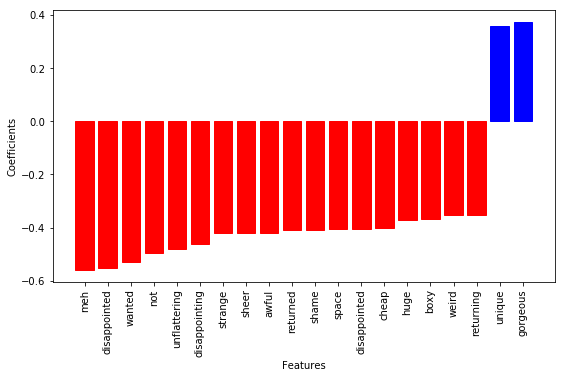

In [33]:
fig=plt.figure(figsize=(9,5))
barplot=plt.bar(range(20),df_feature_vect1['coef'])
plt.xticks(range(20),df_feature_vect1['feature'],rotation=90)
plt.xlabel('Features');plt.ylabel('Coefficients')
for i in range(20):
    if df_feature_vect1['coef'].loc[i]<0:
        barplot[i].set_color('red')
    else:
        barplot[i].set_color('blue')

**By comparing the cross validation scores of F1, we can see that option 3 has the highest score. Therefore, option 3 works best. Now we want to use test data on the model trained from option3.**

In [34]:
df_t,test_label=data_test[['Title','Review']],data_test['Recommended']
df_test=df_t.apply(Concat,axis=1)
test_title_text=vect_tt.transform(df_test)

In [35]:
test_score=grid_tt.score(test_title_text,test_label)
print('The test score using f1 score under option 3 is %.6f' %test_score)

The test score using f1 score under option 3 is 0.967294


# Task 2

## Task 2.1

In [36]:
df_train=df.apply(Concat,axis=1)
df_test=df_t.apply(Concat,axis=1)

In [37]:
pipe2 = make_pipeline(TfidfVectorizer(), LinearSVC())
param_tb2 = {'linearsvc__C':np.logspace(-1,1,50)}
grid_tb2 = GridSearchCV(pipe2, param_tb2, cv = 5, scoring = scoring_fun, n_jobs=5)
grid_tb2.fit(df_train,label)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'linearsvc__C': array([  0.1    ,   0.10985,   0.12068,   0.13257,   0.14563,   0.15999,
         0.17575,   0.19307,   0.2121 ,   0.233  ,   0.25595,   0.28118,
         0.30888,   0.33932,   0.37276,   0.40949,   0.44984,   0.49417,
         0.54287,   0.59636,   0.65513,   0.71969,   ...      5.17947,   5.68987,   6.25055,   6.86649,   7.54312,   8.28643,
         9.10298,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_tra

In [38]:
print("Best regularization parameter C: ", grid_tb2.best_params_['linearsvc__C'])
print("Best {:s} cross-validation score using TfidfVectorizer: {:.6f}\n".format(scoring_fun,grid_tb2.best_score_))
print('===========Comparison============')
print("Best {:s} cross-validation score using TfidfVectorizer: {:.6f}".format(scoring_fun,grid_tb2.best_score_))
print("Best {:s} cross-validation score using CountVectorizer: {:.6f}".format(scoring_fun,grid_tt.best_score_))

Best regularization parameter C: 0.2811824181052
Best f1 cross-validation score using TfidfVectorizer: 0.945561

===========Comparison============
Best f1 cross-validation score using TfidfVectorizer: 0.945561
Best f1 cross-validation score using CountVectorizer: 0.942791


In [39]:
tfvectorizer = grid_tb2.best_estimator_.named_steps["tfidfvectorizer"]
tfmodel=grid_tb2.best_estimator_.named_steps['linearsvc']
imp_f_ind=np.argsort(abs(tfmodel.coef_)).ravel()[-20:]
feature_name=np.array(tfvectorizer.get_feature_names())[imp_f_ind]

In [40]:
df_feature2=pd.DataFrame({'feature_tfidf':feature_name,
                          'coef_tfidf':tfmodel.coef_.ravel()[imp_f_ind]})
df_feature2.sort_index(by='coef_tfidf',inplace=True)
df_feature2.reset_index(inplace=True)
df_feature2.drop('index',axis=1,inplace=True)
df_feature2[['coef_countvect','feature_countvect']]=df_title_text1[['coef','features']]
df_feature2

,coef_tfidf,feature_tfidf,coef_countvect,feature_countvect
0,-2.521710,disappointed,-0.482325,meh
1,-2.062426,wanted,-0.451551,disappointed
2,-2.008279,cheap,-0.403736,shame
3,-1.732543,meh,-0.393199,awful
4,-1.731874,unflattering,-0.380919,returned
5,-1.698466,returned,-0.378972,cheap
6,-1.688226,poor,-0.366068,disappointing
7,-1.686677,not,-0.359551,horrible
8,-1.646709,huge,-0.343568,wanted
9,-1.602540,returning,-0.340530,returning


**The best f1 cross-validation score using TfidfVectorizer: 0.945561 while the best f1 cross-validation score using CountVectorizer: 0.942791.**

**Therefore, we can see that using TfidfVectorizer instead of CountVectorizer will improve the f1 score a little. We can also notice that the top 20 features with highest absolute coefficient values are also different.**

**In the graphs below, we showed the coefficient plots for both TfidfVectorizer and CountVectorizer. We can see that the scale of coefficients of TfidfVectorizer is also larger.**

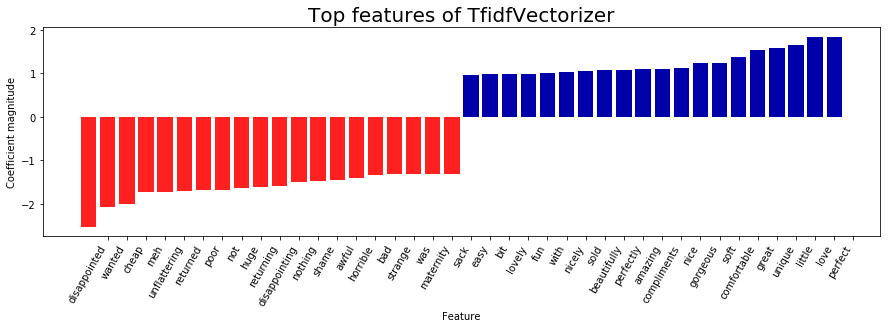

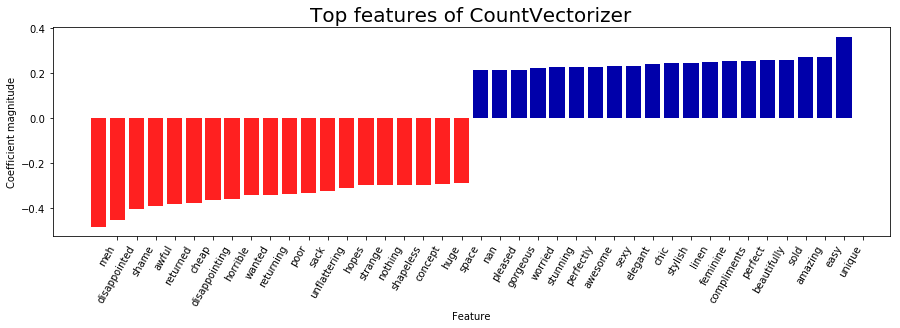

In [41]:
mglearn.tools.visualize_coefficients(
    grid_tb2.best_estimator_.named_steps["linearsvc"].coef_,
    grid_tb2.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names(),
    n_top_features=20)
plt.title('Top features of TfidfVectorizer',fontsize=20)
mglearn.tools.visualize_coefficients(
    grid_tt.best_estimator_.coef_,
    vect_tt.get_feature_names(),
    n_top_features=20)
plt.title('Top features of CountVectorizer',fontsize=20)

## Task 2.2

In [42]:
pipe = make_pipeline(CountVectorizer(),Normalizer(), LinearSVC())
param_cv_norm = {'linearsvc__C':np.logspace(-1,1,10)}
grid_cv_norm = GridSearchCV(pipe, param_cv_norm, cv = 5, scoring = scoring_fun)
grid_cv_norm.fit(df_train,label)
print("Best {:s} cross-validation score sfter normalization for CountVectorizer: {:.6f}".format(scoring_fun,grid_cv_norm.best_score_))
print("Best regularization parameters: ", grid_cv_norm.best_params_['linearsvc__C'])

Best f1 cross-validation score sfter normalization for CountVectorizer: 0.944516
Best regularization parameters:  1.29154966501


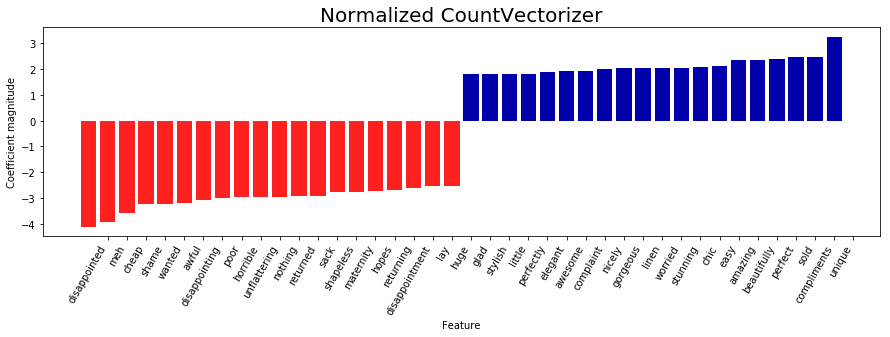

In [43]:
count_vect_norm=grid_cv_norm.best_estimator_.named_steps['countvectorizer']
count_model_norm=grid_cv_norm.best_estimator_.named_steps['linearsvc']
mglearn.tools.visualize_coefficients(
        count_model_norm.coef_,count_vect_norm.get_feature_names(),n_top_features=20)
plt.title('Normalized CountVectorizer',fontsize=20)

**The best f1 cross-validation score using CountVectorizer without Normalization: 0.942791; while the best f1 cross-validation score using CountVectorizer with Normalization: 0.944516.**

**Therefore we can see that the performance improves after applying normalization. Still, the score of TfidfVectorizer is a little higher.**

## Task 2.3

### 2.3.1 Stop-word with TfidfVectorizer

In [44]:
pipe = make_pipeline(TfidfVectorizer(stop_words='english'), LinearSVC())
param_tb = {'linearsvc__C':np.logspace(-1,1,20)}
grid_tb_sw = GridSearchCV(pipe, param_tb, cv = 5, scoring = scoring_fun)
grid_tb_sw.fit(df_train,label)
print("Best {:s} cross-validation score with stop words: {:.6f}".format(scoring_fun,grid_tb_sw.best_score_))
print("Best regularization parameters: ", grid_tb_sw.best_params_['linearsvc__C'])

Best f1 cross-validation score with stop words: 0.941873
Best regularization parameters:  0.428133239872


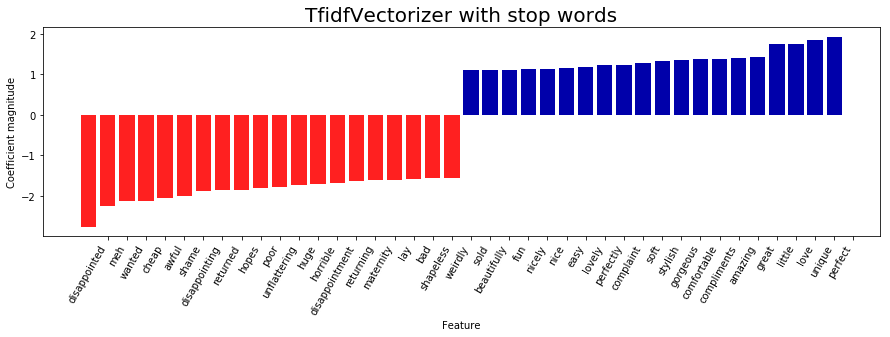

In [45]:
tf_vect_sw=grid_tb_sw.best_estimator_.named_steps['tfidfvectorizer']
tf_model_sw=grid_tb_sw.best_estimator_.named_steps['linearsvc']
mglearn.tools.visualize_coefficients(
        tf_model_sw.coef_,tf_vect_sw.get_feature_names(),n_top_features=20)
plt.title('TfidfVectorizer with stop words',fontsize=20)

### 2.3.2 Stop-word with CountVectorizer and normalized

In [46]:
pipe = make_pipeline(CountVectorizer(stop_words='english'),Normalizer(), LinearSVC())
param_cv_sw = {'linearsvc__C':np.logspace(-1,1,20)}
grid_cv_sw = GridSearchCV(pipe, param_cv_sw, cv = 5, scoring = scoring_fun)
grid_cv_sw.fit(df_train,label)
print("Best {:s} cross-validation score sfter normalization with stop words: {:.6f}".format(scoring_fun,grid_cv_sw.best_score_))
print("Best regularization parameters: ", grid_cv_sw.best_params_['linearsvc__C'])

Best f1 cross-validation score sfter normalization with stop words: 0.942286
Best regularization parameters:  0.428133239872


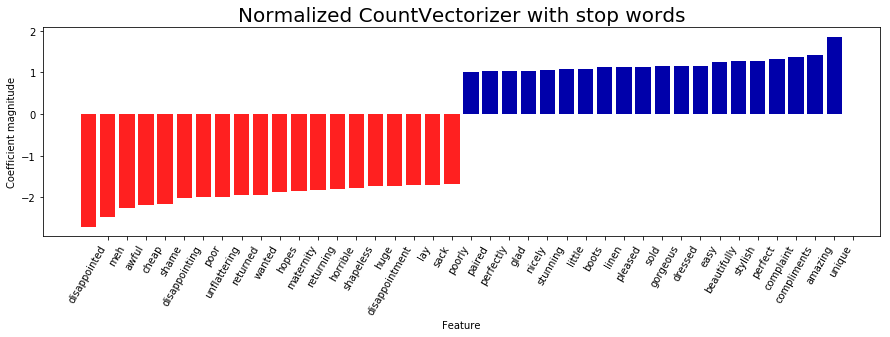

In [47]:
count_vect_sw=grid_cv_sw.best_estimator_.named_steps['countvectorizer']
count_model_sw=grid_cv_sw.best_estimator_.named_steps['linearsvc']
mglearn.tools.visualize_coefficients(
        count_model_sw.coef_,count_vect_sw.get_feature_names(),n_top_features=20)
plt.title('Normalized CountVectorizer with stop words',fontsize=20)

**From the results, we can see that the score for both TfidfVectorizer and Normalized CountVectorizer decreased after eliminating standard english stop words. Hence, removing stop words does not help.**

**For supervised learning problems, the model will automatically identify the importance of each word in the process of training. Therefore, removing the stop words will only compromise the amount of information that the model recieves.**

## Task 2.4

### 2.4.1 TfidfVectorizer with min_df

In [48]:
min_df_list=[2,4,6,10,20,50,100,200,500]
max_df_list=[5,10,20,50,100,200,500,1000]
mindf_score={};maxdf_score={}
mindf_score['score']=[];mindf_score['num_feature']=[]
maxdf_score['score']=[];maxdf_score['num_feature']=[]
for min_df in min_df_list: 
    pipe =make_pipeline(TfidfVectorizer(min_df=min_df),LinearSVC())
    param_tb ={'linearsvc__C':np.logspace(-1,1,20)}
    grid_tb4 =GridSearchCV(pipe, param_grid=param_tb,cv=5,scoring=scoring_fun).fit(df_train,label)
    mindf_score['score'].append(grid_tb4.best_score_)
    mindf_score['num_feature'].append(len(grid_tb4.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()))

### 2.4.2 TfidfVectorizer with max_df

In [49]:
for max_df in max_df_list: 
    pipe =make_pipeline(TfidfVectorizer(max_df=max_df),LinearSVC())
    param_tb ={'linearsvc__C':np.logspace(-1,1,20)}
    grid_tb4 =GridSearchCV(pipe, param_grid=param_tb,cv=5,scoring=scoring_fun).fit(df_train,label)
    maxdf_score['score'].append(grid_tb4.best_score_)
    maxdf_score['num_feature'].append(len(grid_tb4.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()))

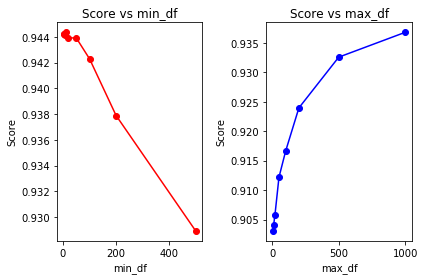

In [50]:
fig,ax=plt.subplots(1,2)
ax[0].plot(min_df_list,mindf_score['score'],'r-o')
ax[0].set_title('Score vs min_df')
ax[0].set_xlabel('min_df');ax[0].set_ylabel('Score')
ax[1].plot(max_df_list,maxdf_score['score'],'b-o')
ax[1].set_title('Score vs max_df')
ax[1].set_xlabel('max_df');ax[1].set_ylabel('Score')
plt.tight_layout()

**We can see that when the min_df increases, the f1 score decreases. When the max_df increases, the f1 score increases.**

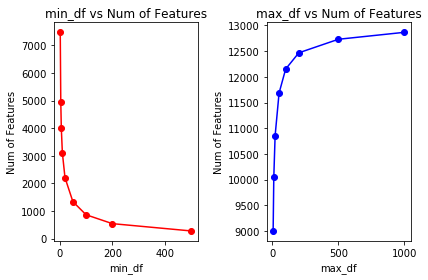

In [51]:
fig,ax=plt.subplots(1,2)
ax[0].plot(min_df_list,mindf_score['num_feature'],'r-o')
ax[0].set_title('min_df vs Num of Features')
ax[0].set_xlabel('min_df');ax[0].set_ylabel('Num of Features')
ax[1].plot(max_df_list,maxdf_score['num_feature'],'b-o')
ax[1].set_title('max_df vs Num of Features')
ax[1].set_xlabel('max_df');ax[1].set_ylabel('Num of Features')
plt.tight_layout()

**We can see that when the min_df increases, the number of features decreases. When the max_df increases, the number of features increases.**

## Test Score

In [52]:
tfidf_tscore=grid_tb2.score(df_test,test_label)
print('The %s test score using TfidfVectorizer without stop words is %.6f'%(scoring_fun,tfidf_tscore))

The f1 test score using TfidfVectorizer without stop words is 0.963315


# Task 3

## Task 3.1

In [53]:
def ngram_len(record):
    return len(record.split())
df_train=df.apply(Concat,axis=1)
df_test=df_t.apply(Concat,axis=1)

In [54]:
min_df=[2,4,6,10]
ngram_range=[(1, 2), (1, 5) ,(2, 3), (2, 5)]
stop_words=[None,'english']
pipe_ng=make_pipeline(TfidfVectorizer(),LinearSVC(),memory='cache_folder')
param_ng={'tfidfvectorizer__min_df':min_df,
          'tfidfvectorizer__ngram_range':ngram_range,
          'tfidfvectorizer__stop_words':stop_words,
          'linearsvc__C':np.logspace(0,2,30)}
grid_ng=GridSearchCV(pipe_ng,param_grid=param_ng,cv=5,scoring=scoring_fun,n_jobs=6).fit(df_train,label)
print('The best regulation coefficient is %.6f'%grid_ng.best_params_['linearsvc__C'])
print('The best min_df is %d'%grid_ng.best_params_['tfidfvectorizer__min_df'])
print('The best ngram is (%d, %d)'%grid_ng.best_params_['tfidfvectorizer__ngram_range'])
print('The usage of stop words is %s'%str(grid_ng.best_params_['tfidfvectorizer__stop_words']))
print('The best mean cross validation score using %s is %.6f'%(scoring_fun,grid_ng.best_score_))

The best regulation coefficient is 9.236709
The best min_df is 2
The best ngram is (1, 5)
The usage of stop words is None
The best mean cross validation score using f1 is 0.947679


In [55]:
n_order=2
df_ngram=pd.DataFrame({'feature':grid_ng.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names(),
                       'coef':grid_ng.best_estimator_.named_steps['linearsvc'].coef_.ravel()})
df_ngram['ngram']=df_ngram['feature'].apply(ngram_len)
df_high_order=df_ngram[df_ngram['ngram']>=n_order]
df_high_order.reset_index(inplace=True)
df_high_order.drop('index',axis=1,inplace=True)

In [56]:
imp_f_ind=np.r_[np.argsort(df_high_order['coef']).ravel()[-20:],np.argsort(df_high_order['coef']).ravel()[:20]]
df_feature_ng=df_high_order.loc[imp_f_ind]
df_feature_ng.sort_index(by='coef',inplace=True)
df_feature_ng.reset_index(inplace=True)

**Therefore, among the choice of (1, 2), (1, 5) ,(2, 3), (2, 5) for n_grams, (1, 5) gives the best f1 score, probably because it incorporate the most information.**

**In the graph below, only n_grams with order higher or euqal to 2 is visualized.**

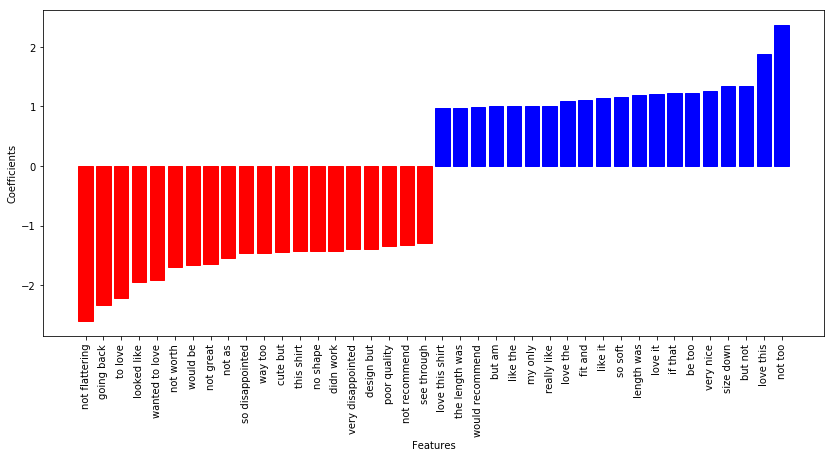

In [57]:
fig=plt.figure(figsize=(14,6))
barplot=plt.bar(range(40),df_feature_ng['coef'])
plt.xticks(range(40),df_feature_ng['feature'],rotation=90)
plt.xlabel('Features');plt.ylabel('Coefficients')
for i in range(40):
    if df_feature_ng['coef'].loc[i]<0:
        barplot[i].set_color('red')
    else:
        barplot[i].set_color('blue')

## Task 3.2

In [58]:
min_df=[2,4,6,10]
ngram_range_ch=[(2, 3), (2, 5), (2, 7), (3, 5), (3, 7)]
stop_words_ch=[None,'english']
param_char={'tfidfvectorizer__min_df':min_df,
            'tfidfvectorizer__ngram_range':ngram_range_ch,
            'tfidfvectorizer__stop_words':stop_words_ch,
            'linearsvc__C':np.logspace(-1,1,10)}
pipe_char=make_pipeline(TfidfVectorizer(analyzer='char_wb'),LinearSVC())
grid_char=GridSearchCV(pipe_char,param_grid=param_char,cv=5,scoring=scoring_fun,n_jobs=6).fit(df_train,label)

In [59]:
print('The best regulation coefficient is %.6f'%grid_char.best_params_['linearsvc__C'])
print('The best min_df is %d'%grid_char.best_params_['tfidfvectorizer__min_df'])
print('The best ngram is (%d, %d)'%grid_char.best_params_['tfidfvectorizer__ngram_range'])
print('The usage of stop words is %s'%str(grid_char.best_params_['tfidfvectorizer__stop_words']))
print('The best mean cross validation score using %s is %.6f'%(scoring_fun,grid_char.best_score_))

The best regulation coefficient is 0.464159
The best min_df is 6
The best ngram is (2, 7)
The usage of stop words is None
The best mean cross validation score using f1 is 0.945138


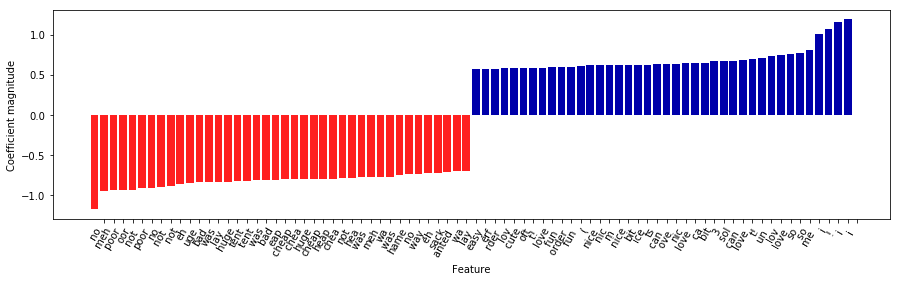

In [60]:
char_f_name=grid_char.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
mglearn.tools.visualize_coefficients(
        grid_char.best_estimator_.named_steps['linearsvc'].coef_,char_f_name,
        n_top_features=40)

**From character n_grams of (2, 7), we can see that words like `love`, `nice`, `cute` keep being in the list of features whose coefficients are significantly positive, while words like `poor`, `bad`, `cheap` also keep being in the list of features whose coefficients are significantly negatve.**

**Character n_grams might be robust to typos, but it is also repeating much information, making some important features hard to stand out.**

## Task 3.3

In [61]:
df_cv=pd.DataFrame(grid_ng.cv_results_)[['param_tfidfvectorizer__min_df', 'param_tfidfvectorizer__ngram_range',
                                         'param_tfidfvectorizer__stop_words', 'mean_test_score']]
df_cv.columns=['min df','ngram range','stop words','% score'%scoring_fun]
df_cv['stop words']=df_cv['stop words'].apply(str)
df_pivot_ng=pd.pivot_table(df_cv,index=['min df','stop words'],
                     columns=['ngram range'],values='% score'%scoring_fun )
df_pivot_ng

ngram range          (1, 2)    (1, 5)    (2, 3)    (2, 5)
min df stop words                                        
2      None        0.945401  0.947429  0.938967  0.938715
       english     0.940764  0.941422  0.923259  0.923138
4      None        0.943761  0.945620  0.936882  0.936481
       english     0.936575  0.937237  0.912291  0.912364
6      None        0.942516  0.944067  0.934759  0.935044
       english     0.932924  0.933572  0.901209  0.901342
10     None        0.940571  0.941757  0.931109  0.931681
       english     0.928289  0.928261  0.891741  0.891675

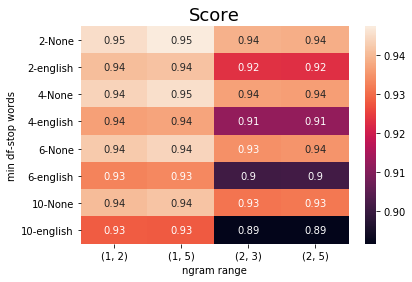

In [62]:
plt.title('Score',fontsize=18)
sns.heatmap(df_pivot_ng,annot=True)

**From the heatmap we can see that:**
* Rmoving the stop words generally doesn't help improve the model. 
* The higher min_df is, the worse the f1 score.
* The model with n_grams=(1, 5) performs better than any other three under any conditions.

In [63]:
stop_words=[None,'english']
f_result={'min_df':[],'ngram_range':[],'stop_word':[],'feature_len':[]}
for mindf in min_df:
    for ng in ngram_range:
        for sw in stop_words:
            vect=CountVectorizer(min_df=mindf,ngram_range=ng,stop_words=sw).fit(df_train)
            f_result['min_df'].append(mindf)
            f_result['ngram_range'].append(ng)
            f_result['stop_word'].append(str(sw))
            f_result['feature_len'].append(len(vect.get_feature_names()))
f_result=pd.DataFrame(f_result)

In [64]:
df_pivot_flen=pd.pivot_table(f_result,index=['min_df','stop_word'],columns=['ngram_range'],values='feature_len')
df_pivot_flen

ngram_range       (1, 2)  (1, 5)  (2, 3)  (2, 5)
min_df stop_word                                
2      None        75335  259947  163139  252470
       english     58528   85028   73286   77825
4      None        36408   86047   62758   81082
       english     22583   26869   21752   22163
6      None        24977   51132   38780   47125
       english     14069   15846   11955   12090
10     None        15906   28035   21690   24921
       english      8062    8644    5744    5774

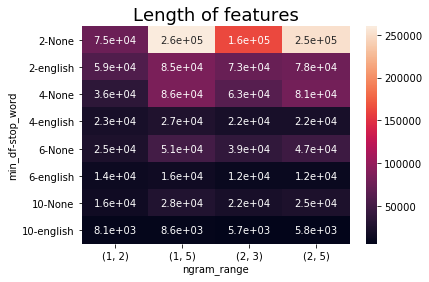

In [65]:
plt.title('Length of features',fontsize=18)
sns.heatmap(df_pivot_flen,annot=True)

**From the heatmap we can see that:**
* Rmoving the stop words would decrease the number of features. 
* The higher min_df is, the less the features are.
* The model with n_grams=(1, 5) generally has more features than any other three under any conditions.

## Test Score

In [66]:
test_score_ng=grid_ng.score(df_test,test_label)
print('The %s test score on test data using word analyzer with best parameters is %.6f' %(scoring_fun,test_score_ng))

The f1 test score on test data using word analyzer with best parameters is 0.998139


# Task 4

In [67]:
best_tfidf_train=grid_ng.best_estimator_.named_steps['tfidfvectorizer'].transform(df_train)
best_tfidf_test=grid_ng.best_estimator_.named_steps['tfidfvectorizer'].transform(df_test)
best_model=grid_ng.best_estimator_.named_steps['linearsvc']
print('The best parameters are:')
print('Regularization parameter: %.5f'%grid_ng.best_params_['linearsvc__C'])
print('Min_df for TfidfVectorizer is %d'%grid_ng.best_params_['tfidfvectorizer__min_df'])
print('Ngram_range for TfidfVectorizer is (%d, %d)'%grid_ng.best_params_['tfidfvectorizer__ngram_range'])
print('Stop_words for TfidfVectorizer is %s'%str(grid_ng.best_params_['tfidfvectorizer__stop_words']))

The best parameters are:
Regularization parameter: 9.23671
Min_df for TfidfVectorizer is 2
Ngram_range for TfidfVectorizer is (1, 5)
Stop_words for TfidfVectorizer is None


In [68]:
feature_prop=0.3
n=int(feature_prop*len(best_model.coef_.ravel()))
select_index=np.argsort(abs(best_model.coef_)).ravel()[-n:]
selected_df=best_tfidf_train[:,select_index]
selected_df_test=best_tfidf_test[:,select_index]

In [69]:
lr_classif=LogisticRegression(penalty='l2')
param_lr={'C':np.logspace(5,8,20)}
grid_lr=GridSearchCV(lr_classif,param_grid=param_lr,cv=5,scoring=scoring_fun).fit(selected_df,label)
print('The best regularization parameter for l2 model is %.5f' %grid_lr.best_params_['C'])
print('The best %s score for l2 penalty is %.5f'%(scoring_fun,grid_lr.best_score_))

The best regularization parameter for l2 model is 2636650.89873
The best f1 score for l2 penalty is 0.96783


In [70]:
lasso_classif=LogisticRegression(penalty='l1')
param_lasso={'C':np.logspace(5,8,20)}
grid_lasso=GridSearchCV(lasso_classif,param_grid=param_lasso,scoring=scoring_fun).fit(selected_df,label)
print('The best regularization parameter for l1 model is %.5f' %grid_lasso.best_params_['C'])
print('The best %s score for l1 penalty is %.5f'%(scoring_fun,grid_lasso.best_score_))

The best regularization parameter for l1 model is 885866.79041
The best f1 score for l1 penalty is 0.95353


**Therefore, the performace of `l2` penalty is better and the final test score is as below.**

## Test Score

In [71]:
test_score_l2=grid_lr.score(selected_df_test,test_label)
print('The f1 test score using linear classifier with l2 penalty is %.6f'%test_score_l2)

The f1 test score using linear classifier with l2 penalty is 0.998139


## Other Trials

* Except for the bag of words, we can also try to extract semantics from the training data using LSA or LDA. Then we can retrain the model after picking out the relavant or significant components.

* Beyond linear models, we can also try some non-linear models like Random Forest Classifier.

* In order to adjust the fact that the data is imbalanced, we can also try some other methods like random over sampling or under sampling.